In [13]:
%matplotlib inline
import matplotlib
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from ipywidgets import interact
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = (15, 10)
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sqlalchemy import create_engine
import datetime
import numpy as np
import re
from matplotlib.pylab import rcParams
import sqlite3
import seaborn as sns; sns.set()
from tqdm import tqdm
rcParams['figure.figsize'] = 12, 10
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
# To really use the Quandl API. Limited usage doesn't require authtoken.

authtoken = None
# authtoken = "your token here"

def get_quandl(what):
    """ 
    Wrapper around Quandl requests, using authtoken only if available
    """
    if authtoken:
        return quandl.get(what, authtoken=authtoken)
    else:
        return quandl.get(what, start_date="2013-01-31", end_date="2015-12-31")

In [22]:
oil = read_csv('satallbor475.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [23]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=24).mean() # 24 hours on each day
    rolstd = timeseries.rolling(window=24).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

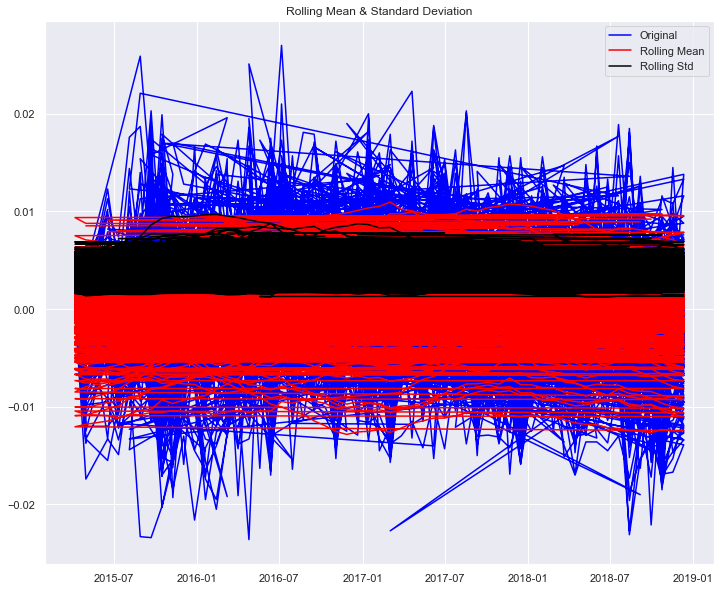

Results of Dickey-Fuller Test:
Test Statistic                -1.251354e+01
p-value                        2.641877e-23
#Lags Used                     4.100000e+01
Number of Observations Used    1.468600e+04
Critical Value (1%)           -3.430795e+00
Critical Value (5%)           -2.861737e+00
Critical Value (10%)          -2.566875e+00
dtype: float64


In [24]:
test_stationarity(oil)

In [27]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(oil, order=(2, 1, 3))  
results_ARIMA = model.fit(disp=-1)  

C:\Users\thoma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\thoma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\thoma\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [30]:
arima_pred = results_ARIMA.predict(oil.index[500], oil.index[-1], typ="levels")

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Timestamp'

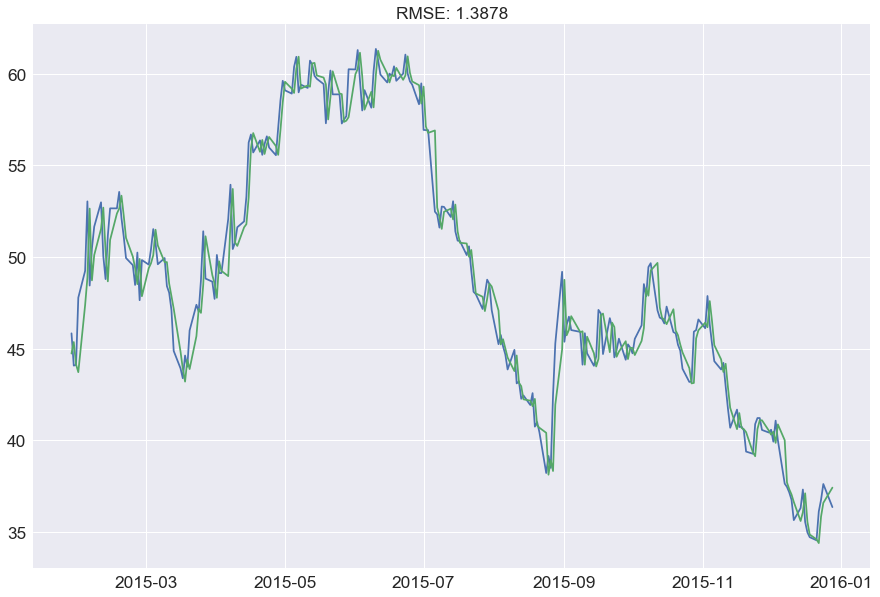

In [85]:
predictions_ARIMA = arima_pred
plt.plot(oil.Value[500:])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-oil.Value[500:])**2)/len(oil.Value[500:])))

In [45]:
len(arima_pred)

238